In [102]:
import numpy as np
import random as rm
import pandas as pd
from sklearn import preprocessing
# from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [4]:
def getdata(fname):
    data = pd.read_csv(fname)
    xdata = data.drop("Class", axis=1)
    ydata = data['Class']
    return xdata, ydata

In [149]:
xdata_train, ydata_train = getdata('Dry_Bean_train.csv')
xdata_test, ydata_test = getdata('Dry_Bean_test.csv')
# print(xdata_train)

## preprocessing
# Convert Class String labels into Integers
lab_enc = preprocessing.LabelEncoder()
ydata_train = lab_enc.fit_transform(ydata_train)
ydata_test = lab_enc.transform(ydata_test)

# Standarlize
scaler_train = preprocessing.StandardScaler().fit(xdata_train)
# scaler_test = preprocessing.StandardScaler().fit(xdata_test)

xdata_train_scaled = scaler_train.transform(xdata_train)
xdata_test_scaled = scaler_train.transform(xdata_test)

In [150]:
def shuffle(xdata, ydata):
    newX = np.copy(xdata)
    newY = np.copy(ydata)
    N = len(newX)
    shuff = np.random.permutation(N)
    for i in range(N):
        newX[i] = xdata[shuff[i]]
        newY[i] = ydata[shuff[i]]
    return (newX, newY)

In [128]:
def calculate_classify_accuracy(xdata, ydata, weights):
    gx = np.dot(xdata,weights.T)
    accuracy = np.sum(np.argmax(gx, axis = 1) == ydata) / len(xdata)
    return accuracy

In [129]:
def calculate_J(xdata, ydata, weights):
    ans = 0
    N = len(xdata)
    for i in range(N):
        target = ydata[i]
        gx = weights @ xdata[i]
        predict = np.argmax(gx)
        
        if(target != predict):
            ans += np.dot(xdata[i],weights[target].T) - np.dot(xdata[i],weights[predict].T)
    return ans * -1

In [151]:
def multiclass_perceptron_learning(xdata, ydata, maxEpochs):
    """
    xdata: (N, D) data array, non-augmented format
    ydata: (N, ) labels(1.0, 2.0)
    maxEpochs: max number of passes through the data.  Halts sooner if no classififcation errors
    """
    N, D = xdata.shape
    C = np.argmax(np.unique(ydata)) + 1
#     print(C, N, D)
    eta = 1
    
    weights = np.ones((C, D + 1))
    xdata_aug = np.ones((N, D + 1))
    xdata_aug[:, 1:] = xdata
    acc = 0
    
    min_J = 99999999
    final_weights = np.copy(weights)
    
    for e in range(maxEpochs):
        # 1.shuffle
        xdata_aug, ydata = shuffle(xdata_aug, ydata)
        
        # 2.For each data point x, update w
        for i in range(N):
            target = ydata[i]
            gx = weights @ xdata_aug[i]
            predict = np.argmax(gx)
            
            if(target != predict):
                weights[target] = weights[target] + eta * xdata_aug[i]
                weights[predict] = weights[predict] - eta * xdata_aug[i]
            if( e == maxEpochs - 1 and N - i <= 100):
                J = calculate_J(xdata_aug, ydata, weights)
                if( J <= min_J ):
                    min_J = J
                    final_weights = np.copy(weights)
                    
    return final_weights            

In [142]:
def predict_label(xdata, weights):
    weights = np.asarray(weights)
    gx = np.dot(xdata,weights.T)
    return np.argmax(gx, axis = 1)

In [176]:
def plot_confusion_matrix(target_label, predict_label):
    cm = confusion_matrix(target_label, predict_label) 
    disp = ConfusionMatrixDisplay(confusion_matrix=cm) 
    disp.plot()
    plt.figure()
    plt.show()

In [156]:
final_weights = multiclass_perceptron_learning(xdata_train_scaled, ydata_train, 100)

In [161]:
print("Final weights is :", final_weights)
print("Magtitude is :", np.linalg.norm(final_weights, axis = 1))


Final weights is : [[ 5.00000000e+00  2.12796720e+00  7.60585752e+00  1.34295771e+00
   1.19911622e+01 -6.75631691e+00 -1.00905513e-01  2.29432636e+00
   6.88080450e+00 -1.67181508e+00 -4.51363017e+00 -6.92410801e+00
   6.26528919e+00 -1.32294487e+01 -8.50954425e+00  5.28559780e+00
   1.25934303e+01]
 [-2.10000000e+01  2.28191891e+01  8.81236711e+00  8.42526643e+00
   1.09445976e+01 -2.58056370e+00 -4.59697369e+00  2.29915094e+01
   9.82708714e+00  1.87271995e+00 -1.82682445e+00  9.28829013e+00
   5.56959815e+00  1.04208363e+01  1.12187898e+01  5.86054176e+00
   1.94915034e+00]
 [-3.00000000e+00 -1.32628798e+00  5.43166932e+00  9.50334710e+00
   4.57098025e+00  2.58745515e+00  4.59194022e+00 -1.40322074e+00
   7.59502709e+00  2.37526651e+00  2.08404690e+00  9.99850477e+00
  -2.50000669e+00 -1.73368610e+01 -5.91919045e+00 -2.79498942e+00
  -7.72103551e+00]
 [ 4.00000000e+00 -5.89423748e+00 -8.55906568e+00 -8.07684600e+00
  -9.08011520e+00 -1.99306440e+00  9.20299976e+00 -5.93997408e+00


The accuracy on the training set is : 91.22377336925463  %


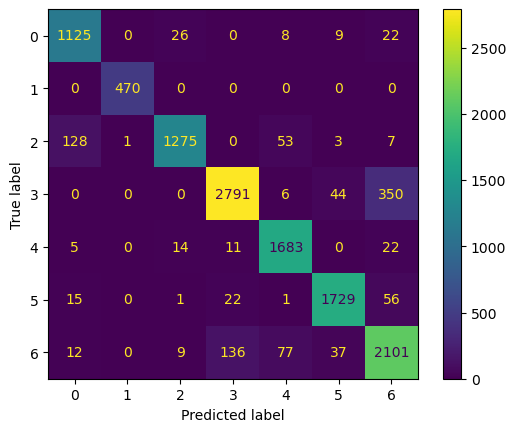

<Figure size 640x480 with 0 Axes>

In [177]:
# Augment scaled data
N_train, D_train = xdata_train_scaled.shape
xdata_train_aug = np.ones((N_train, D_train + 1))
xdata_train_aug[:, 1:] = xdata_train_scaled

# Calculate accuracy and plot the confusion matrix
train_accuracy = calculate_classify_accuracy(xdata_train_aug, ydata_train, final_weights)
print("The accuracy on the training set is :", train_accuracy * 100 , " %")

predict_train_label = predict_label(xdata_train_aug,final_weights )
plot_confusion_matrix(ydata_train, predict_train_label)

The accuracy on the training set is : 90.38179148311308  %


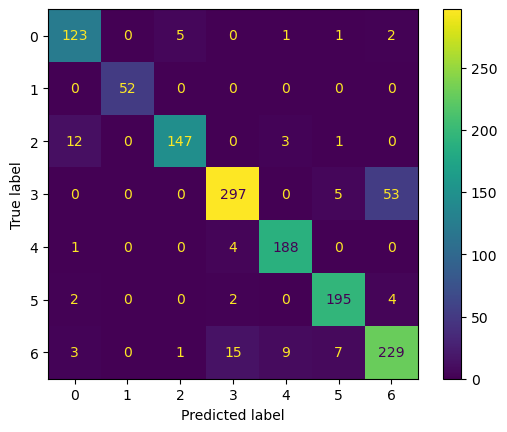

<Figure size 640x480 with 0 Axes>

In [178]:
# Augment scaled data
N_test, D_test = xdata_test_scaled.shape
xdata_test_aug = np.ones((N_test, D_test + 1))
xdata_test_aug[:, 1:] = xdata_test_scaled

# Calculate accuracy and plot the confusion matrix
test_accuracy = calculate_classify_accuracy(xdata_test_aug, ydata_test, final_weights)
print("The accuracy on the training set is :", test_accuracy * 100 , " %")

predict_test_label = predict_label(xdata_test_aug,final_weights )
plot_confusion_matrix(ydata_test, predict_test_label)

In [198]:
# Repeat 10 times
C, D = final_weights.shape
weight_10_mag = np.zeros((10, C))
train_accuracy_10 = np.zeros(10)
test_accuracy_10 = np.zeros(10)
# predict_label_train_10 = np.zeros((10, N_train))
# predict_label_test_10 = np.zeros((10, N_test))
cm_train = []
cm_test = []

for i in range(10):
    weight_10 = multiclass_perceptron_learning(xdata_train_scaled, ydata_train, 100)
    train_accuracy_10[i] = calculate_classify_accuracy(xdata_train_aug, ydata_train, weight_10)
    test_accuracy_10[i] = calculate_classify_accuracy(xdata_test_aug, ydata_test, weight_10)
    weight_10_mag[i] = np.linalg.norm(weight_10, axis = 1)
    predict_label_train_10 = predict_label(xdata_train_aug,weight_10 )
    predict_label_test_10 = predict_label(xdata_test_aug,weight_10 )
    cm_train.append(confusion_matrix(ydata_train, predict_label_train_10)) 
    cm_test.append(confusion_matrix(ydata_test, predict_label_test_10)) 
    

The mean for the trainning accuracy is: 0.9047432443464771
The mean for the testing accuracy is: 0.8960352422907489


The std for the trainning accuracy is: 0.0074947205649701755
The std for the testing accuracy is: 0.008137533628485993


The mean for the magnitude is: [29.56702155 45.90045369 30.87991092 29.25864678 32.27456786 25.35509257
 28.82129615]
The std for the magnitude is: [2.32968867 1.71676904 1.60612051 1.78060799 2.88614301 1.19451596
 1.45609997]


The confusion matrix for the mean of training set is:


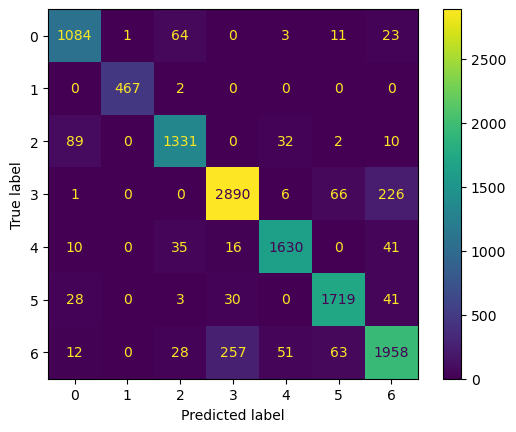

<Figure size 640x480 with 0 Axes>

The confusion matrix for the std of training set is:


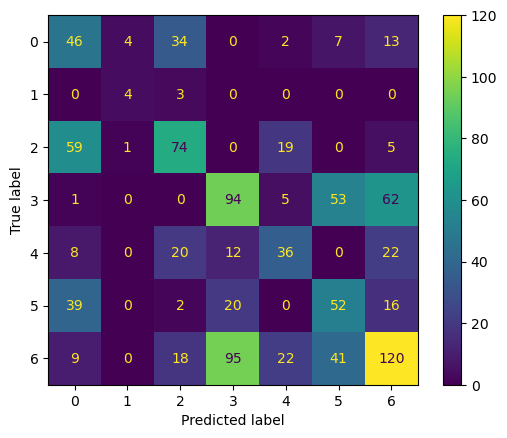

<Figure size 640x480 with 0 Axes>

The confusion matrix for the mean of testing set is:


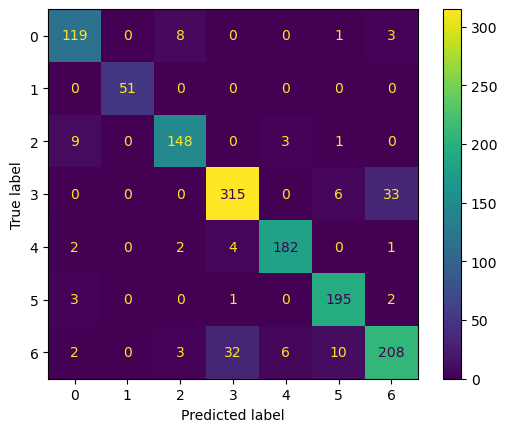

<Figure size 640x480 with 0 Axes>

The confusion matrix for the std of testing set is:


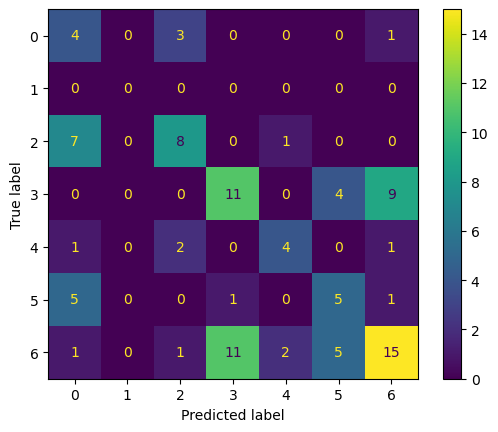

<Figure size 640x480 with 0 Axes>

In [257]:

print("The mean for the trainning accuracy is:", np.mean(train_accuracy_10))
print("The mean for the testing accuracy is:", np.mean(test_accuracy_10))
print("\n")
print("The std for the trainning accuracy is:", np.std(train_accuracy_10))
print("The std for the testing accuracy is:", np.std(test_accuracy_10))
print("\n")
print("The mean for the magnitude is:", np.mean(weight_10_mag, axis = 0))
print("The std for the magnitude is:", np.std(weight_10_mag, axis = 0))
print("\n")

cm_train_array = np.asarray(cm_train)
cm_test_array = np.asarray(cm_test)

cm_mean_train = np.copy(cm_train_array[0])
cm_std_train = np.copy(cm_train_array[0])

cm_mean_test = np.copy(cm_test_array[0])
cm_std_test = np.copy(cm_test_array[0])


temp_train = np.zeros(10)
temp_test = np.zeros(10)
# idx = 0
for i in range(7):
    for j in range(7):
        for n in range(10):
            temp_train[n] = cm_train_array[n][i][j]
            temp_test[n] = cm_test_array[n][i][j]
            
        cm_mean_train[i][j] = np.mean(temp_train)
        cm_std_train[i][j] = np.std(temp_train)
        
        cm_mean_test[i][j] = np.mean(temp_test)
        cm_std_test[i][j] = np.std(temp_test)
        

print("The confusion matrix for the mean of training set is:")
disp = ConfusionMatrixDisplay(confusion_matrix=cm_mean_train) 
disp.plot()
plt.figure()
plt.show()

print("The confusion matrix for the std of training set is:")
disp = ConfusionMatrixDisplay(confusion_matrix=cm_std_train) 
disp.plot()
plt.figure()
plt.show()

print("The confusion matrix for the mean of testing set is:")
disp = ConfusionMatrixDisplay(confusion_matrix=cm_mean_test) 
disp.plot()
plt.figure()
plt.show()

print("The confusion matrix for the std of testing set is:")
disp = ConfusionMatrixDisplay(confusion_matrix=cm_std_test) 
disp.plot()
plt.figure()
plt.show()

